# 饼图和直方图

## 饼图

In [1]:
import matplotlib.pyplot as plt

[None, Text(0.5, 1.0, 'pie')]

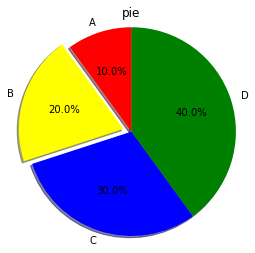

In [3]:
x = [2, 4, 6, 8]
fig, ax = plt.subplots()
labels = ['A', 'B', 'C', 'D']
colors = ['red', 'yellow', 'blue', 'green']
explode = (0, 0.1, 0, 0)
ax.pie(x, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, radius=1.2)
#explode,扇面偏离程度；autopct,扇面显示百分号数值的格式；shadow,是否有阴影；startangle,第一个扇形开始的角度，然后按照逆时针默认排列；radius,设置饼状图半径大小
ax.set(aspect='equal', title='pie')

DataFrame

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./colors.csv')
colors = pd.DataFrame({'productColor':df.values[0:, 1], 'color':df.values[0:, 2]})
colors.head()

FileNotFoundError: [Errno 2] No such file or directory: './colors.csv'

In [ ]:
df2 = pd.read_csv('./bra.csv')
cbras = pd.merge(df2, colors, on='productColor', how='left')
cbras.head()

In [ ]:
color_count = cbras.groupby('color').count()
datas = color_count['productColor']
labels = data.index
position = range(len(data.index))

plt.bar(x=position, height=datas.values, width=0.6, tick_label=labels)


In [ ]:
#对df2中的productSize特征的数值进行清洗
bras2 = df2['productSize'].str.upper()
cup = bras2.str.findall("[a-zA-Z]").str[0] # 用正则表达式进行初步清洗
cup2 = cup.str.replace('M','B')
cup3 = cup2.str.replace('L', 'C')
cup4 = cup3.str.replace('XC', 'D')
cup5 = cup4.str.replace('AB','B')

df2['cup'] = cup5

#数据清洗完毕，进行分组统计，并用饼图表现结果
cup_count = df2.groupby('cup').count()
labels = ['A', 'B', 'C', 'D', 'E']
fig, ax = plt.subplots()
explode = (0, 0.1, 0, 0, 0)
ax.pie(cup_count['productColor'], explode=explode, labels= labels, autopct='%1.1f%%', radius=1.2, startangle=0)
ax.set(aspect='equal')#aspect,图形的X轴与Y轴的缩放比例；auto，使用数据点填满整个长方形；'equal'，与aspect=1相同，即x和y缩放比例相同；float，元将被拉伸，高度等于浮点数乘以宽度


## 直方图

### 频率直方图

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'frequency histogram')

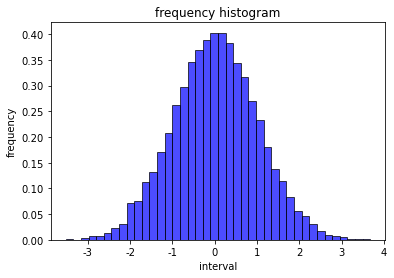

In [10]:
data = np.random.randn(10000)
plt.hist(data, bins=40, density=True, facecolor='blue', edgecolor='black', alpha=0.7)
#bins（默认值是10）,如果为整数为n，则设置直方图由n个小矩形组成，为列表[m, n]，则设置直方图由m到n的范围构成
#density，True表示为频率直方图，直方图面积等于1；false或者未设置，则表示为频数直方图
#edgecolor，表示矩形外周线条的颜色
plt.xlabel('interval')
plt.ylabel('frequency')
plt.title('frequency histogram')

### hist对象

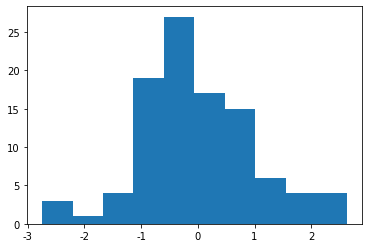

In [11]:
x = np.random.normal(size=100)
n, bins, patches = plt.hist(x)

In [12]:
n#m每个小矩形对应的频数（频率）

array([ 3.,  1.,  4., 19., 27., 17., 15.,  6.,  4.,  4.])

In [13]:
bins #小矩形的边界值

array([-2.7444691 , -2.20781533, -1.67116156, -1.13450779, -0.59785403,
       -0.06120026,  0.47545351,  1.01210728,  1.54876105,  2.08541481,
        2.62206858])

In [14]:
patches#10个小矩形对象组成的列表

<BarContainer object of 10 artists>

[None]

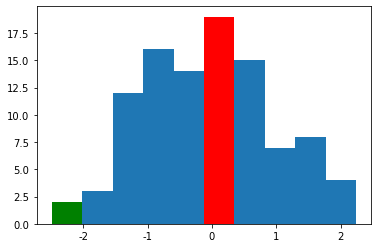

In [35]:
x = np.random.normal(size=100)
n, bins, patches = plt.hist(x)

plt.setp(patches[0], 'facecolor', 'g')#将第0个小矩形的颜色设置为g

max_index = np.where(n==np.max(n))[0][0]#where函数取出来的是元素对应的坐标,n[max_index][0]
plt.setp(patches[max_index], facecolor='r')

### 正态分布（高斯分布）

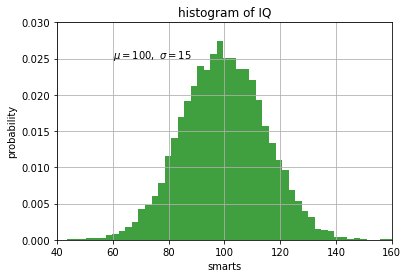

In [43]:
np.random.seed(19680801)

mu, sigma = 100, 15 #表示平均数和方差
x = mu + sigma * np.random.randn(10000)

#绘制直方图，并得到返回值
n, bins, patches = plt.hist(x, bins=50, density=True, facecolor='g', alpha=0.75)

#设置坐标系
plt.xlabel('smarts')
plt.ylabel('probability')
plt.title('histogram of IQ')
plt.text(60, 0.025, r'$\mu=100,\ \sigma=15$')#在坐标值为(60, 0.025)的位置，添加文字；字符串前面添加r表示后面的raw string，不需要转意；
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

### 拉普拉斯分布

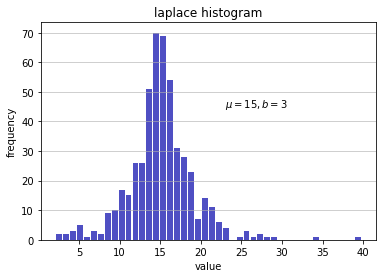

In [46]:
np.random.seed(444)
d = np.random.laplace(loc=15, scale=3, size=500)
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('laplace histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
#plt.ylim(top=np.ceil(maxfreq / 10)* 10 if maxfreq % 10 else maxfreq + 10)